# Analysing simulation results

With `micromagneticdata` we can analyse simulation results created with `oommfc`. This notebook summarises the available functionality.

In [1]:
import os

import micromagneticdata as md

We have a set of example simulations stored in the test directory of `micromagneticdata` that we use to demonstrate its functionality.

In [2]:
dirname = os.path.join("..", "micromagneticdata", "tests", "test_sample")

## `Data`
First, we creata a `Data` object. We need to pass the name of the `micromagneticmodel.System` that we used to run the simulation and optionally an additional path to the base directory.

In [3]:
data = md.Data(name="system_name", dirname=dirname)

The `Data` object contains all simulation runs of the `System`. These are called drives.

In [4]:
data.n

10

In [5]:
data.info

,drive_number,date,time,driver,t,n,Hmin,Hmax
0,0,2022-02-11,12:51:44,TimeDriver,2.500000e-11,25.0,NaN,NaN
1,1,2022-02-11,12:51:45,TimeDriver,1.500000e-11,15.0,NaN,NaN
2,2,2022-02-11,12:51:45,TimeDriver,5.000000e-12,10.0,NaN,NaN
3,3,2022-02-11,12:51:46,MinDriver,NaN,NaN,NaN,NaN
4,4,2022-02-11,12:51:46,TimeDriver,5.000000e-12,5.0,NaN,NaN
5,5,2022-02-11,12:51:46,MinDriver,NaN,NaN,NaN,NaN
6,6,2022-02-11,12:51:47,HysteresisDriver,NaN,21.0,"[0, 0, 1000000.0]","[0, 0, -1000000.0]"
7,7,2022-06-19,16:15:06,RelaxDriver,NaN,NaN,NaN,NaN
8,8,2022-06-19,16:15:07,MinDriver,NaN,NaN,NaN,NaN
9,9,2022-06-19,16:15:08,TimeDriver,5.000000e-09,10.0,NaN,NaN


## `Drive`
To access one `Drive` we can index the `Data` object.

In [6]:
drive = data[0]

The `Drive` object has a number of properties containing information about the drive.

In [7]:
drive.n

25

In [8]:
drive.info

{'drive_number': 0,
 'date': '2022-02-11',
 'time': '12:51:44',
 'driver': 'TimeDriver',
 't': 2.5e-11,
 'n': 25}

In [9]:
drive = data[6]

In [10]:
drive.x

'B_hysteresis'

In [11]:
drive.info

{'drive_number': 6,
 'date': '2022-02-11',
 'time': '12:51:47',
 'driver': 'HysteresisDriver',
 'Hmin': [0, 0, 1000000.0],
 'Hmax': [0, 0, -1000000.0],
 'n': 21}

In [12]:
print(drive.calculator_script)

# MIF 2.2

SetOptions {
  basename system_name
  scalar_output_format %.12g
  scalar_field_output_format {binary 8}
  vector_field_output_format {binary 8}
}

# BoxAtlas for main_atlas
Specify Oxs_BoxAtlas:main_atlas {
  xrange { 0.0 1e-07 }
  yrange { 0.0 5e-08 }
  zrange { 0.0 2e-08 }
  name main
}

# RectangularMesh
Specify Oxs_RectangularMesh:mesh {
  cellsize { 5e-09 5e-09 5e-09 }
  atlas :main_atlas
}

# UniformExchange
Specify Oxs_UniformExchange:exchange {
  A 1.3e-11
}

# FixedZeeman
Specify Oxs_FixedZeeman:zeeman {
  field {0.0 0.0 1000000.0}
}

# m0 file
Specify Oxs_FileVectorField:m0 {
  file m0.omf
  atlas :main_atlas
}

# m0_norm
Specify Oxs_VecMagScalarField:m0_norm {
    field :m0
}

# CGEvolver
Specify Oxs_CGEvolve:evolver {
}

# OxS_UZeeman
Specify Oxs_UZeeman:hysteresis {
  Hrange {
    { 0 0 1000000.0 0 0 -1000000.0 20 }
    { 0 0 -1000000.0 0 0 1000000.0 20 }
  }
}

# MinDriver
Specify Oxs_MinDriver {
  evolver :evolver
  mesh :mesh
  Ms :m0_norm
  m0 :m0
  stoppin

The initial magnetisation can be obtained with `m0`. It returns a `discretisedfield.Field` object.

In [13]:
drive.m0

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=None)

Scalar data of the drive can be accessed via the `table` property that returns a `ubermagtable.Table` object.

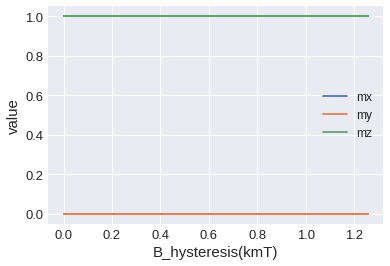

In [14]:
drive.table.mpl(x="B_hysteresis", y=["mx", "my", "mz"])

In [15]:
drive.n

41

We can access the magnetisation at a single step or iterate over the drive.

In [16]:
drive[0]

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m)

In [17]:
list(drive)

[Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4),

It is possible to convert all magnetisation files into vtk for visualisation e.g. in Paraview.

In [18]:
# drive.ovf2vtk()

In [19]:
data[-2].info

{'drive_number': 8,
 'date': '2022-06-19',
 'time': '16:15:07',
 'driver': 'MinDriver'}

In [20]:
data[-2].n

1

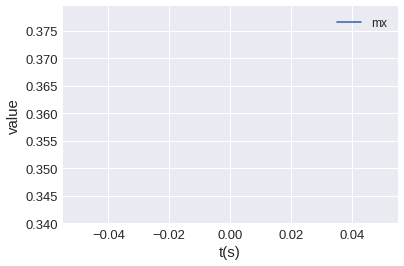

In [21]:
data[-2].table.mpl(y=["mx"])

We can convert a drive into an `xarray.DataArray`. An additional dimension is added depending on the type of drive.

In [22]:
data[1].to_xarray()

<xarray.DataArray 'field' (t: 15, x: 20, y: 10, z: 4, comp: 3)>
array([[[[[ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606]],

         [[ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606]],

         [[ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606]],

         ...,

         [[ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
          [ 154351.17218212,  784953.47212361,   -4874.65353606],
...
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506]],

         ...,

         [[ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506]],

         [[ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506]],

         [[ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506],
          [ 190354.11016335, -774671.87412542,   60405.29929506]]]]])
Coordinates:
  * x        (x) float64 2.5e-09 7.5e-09 1.25e-08 ... 8.75e-08 9.25e-08 9.75e-08
  * y        (y) float64 2.5e-09 7.5e-09 1.25e-08 ... 3.75e-08 4.25e-08 4.75e-08
  * z        (z) float64 2.5e-09 7.5e-09 1.25e-08 1.75e-08
  * comp     (comp) <U1 'x' 'y' 'z'
  * t        (t) float64 1e-12 2e-12 3e-12 4e-12 ... 1.3e-11 1.4e-11 1.5e-11
Attributes:
    units:         A/m
    cell:          (5e-09, 5e-09, 5e-09)
    p1:            (0.0, 0.0, 0.0)
    p2:            (1e-07, 5e-08, 2e-08)
    drive_number:  1
    date:          2022-02-11
    time:          12:51:45
    driver:        TimeDriver
    t:             1.5e-11
    n:             15

In [23]:
data[-2].to_xarray()

<xarray.DataArray 'field' (x: 20, y: 20, z: 1, comp: 3)>
array([[[[ 7.00675188e+05, -3.86075438e+05, -3.13346771e+02]],

        [[ 6.65048812e+05, -4.44646031e+05, -3.13106323e+02]],

        [[ 6.19320000e+05, -5.06401781e+05, -3.33644318e+02]],

        ...,

        [[-1.75525266e+05, -7.80505750e+05, -1.27177136e+03]],

        [[-2.24762719e+05, -7.67775938e+05, -1.33155176e+03]],

        [[-2.59434703e+05, -7.56763812e+05, -1.46627930e+03]]],


       [[[ 7.21049375e+05, -3.46536844e+05, -2.86615723e+02]],

        [[ 6.93671875e+05, -3.98521406e+05, -2.90904022e+02]],

        [[ 6.55573312e+05, -4.58501469e+05, -3.17528809e+02]],
...
        [[-2.16536406e+05,  7.70136438e+05, -1.38442407e+03]],

        [[-2.78445031e+05,  7.49977562e+05, -1.43108533e+03]],

        [[-3.26508750e+05,  7.30335250e+05, -1.55219861e+03]]],


       [[[ 7.00675125e+05,  3.86075406e+05, -3.13348938e+02]],

        [[ 6.65048812e+05,  4.44646062e+05, -3.13108154e+02]],

        [[ 6.19319938e+05,  5.06401781e+05, -3.33647583e+02]],

        ...,

        [[-1.75525281e+05,  7.80505812e+05, -1.27177051e+03]],

        [[-2.24762781e+05,  7.67776000e+05, -1.33154993e+03]],

        [[-2.59434719e+05,  7.56763812e+05, -1.46627563e+03]]]])
Coordinates:
  * x        (x) float64 2.5e-09 7.5e-09 1.25e-08 ... 8.75e-08 9.25e-08 9.75e-08
  * y        (y) float64 2.5e-09 7.5e-09 1.25e-08 ... 8.75e-08 9.25e-08 9.75e-08
  * z        (z) float64 2.5e-09
  * comp     (comp) <U1 'x' 'y' 'z'
Attributes:
    units:         A/m
    cell:          (5e-09, 5e-09, 5e-09)
    p1:            (0.0, 0.0, 0.0)
    p2:            (1e-07, 1e-07, 5e-09)
    drive_number:  8
    date:          2022-06-19
    time:          16:15:07
    driver:        MinDriver

## `CombinedDrive`

Multiple drives can be concatenated to create one "longer" drive. This can e.g. be convenient to analyse multiple consecutive time drives. Combining drives is done via the `<<` operator which appends the right-hand-side drive to the left-hand-side drive. It returns a new `CombinedDrive` object that behaves very similar to the `Drive` object.

In [24]:
combined = data[0] << data[1] << data[2]
combined

CombinedDrive(
  OOMMFDrive(name='system_name', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
  OOMMFDrive(name='system_name', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
  OOMMFDrive(name='system_name', number=2, dirname='../micromagneticdata/tests/test_sample', x='t')
)

The combined drive has a property `drives` that provides a list of all individual drives.

In [25]:
combined.drives

(OOMMFDrive(name='system_name', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
 OOMMFDrive(name='system_name', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
 OOMMFDrive(name='system_name', number=2, dirname='../micromagneticdata/tests/test_sample', x='t'))

In [26]:
combined.info

{'drive_numbers': [0, 1, 2], 'driver': 'TimeDriver'}

We have direct access to the initial magnetisation of the first drive.

In [27]:
combined.m0

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=None)

In [28]:
combined.n

50

The combined drive has one large table that contains the data for all individual drives.

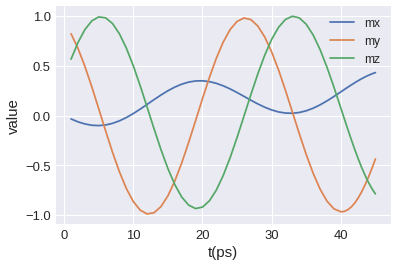

In [29]:
combined.table.mpl(y=["mx", "my", "mz"])

We can iterate over the drives in the combined drive or access a single element.

In [30]:
combined[15]

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m)

In [31]:
list(combined)

[Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z), units=A/m),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4),

In [32]:
combined.x

't'

The combined drive can be converted into an `xarray.DataArray` similar to the normal `Drive`.

In [33]:
combined.to_xarray()

<xarray.DataArray 'field' (t: 50, x: 20, y: 10, z: 4, comp: 3)>
array([[[[[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         ...,

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
...
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]],

         ...,

         [[ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]],

         [[ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]],

         [[ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296],
          [ 345793.85199607, -349773.97904047, -630939.59735296]]]]])
Coordinates:
  * x        (x) float64 2.5e-09 7.5e-09 1.25e-08 ... 8.75e-08 9.25e-08 9.75e-08
  * y        (y) float64 2.5e-09 7.5e-09 1.25e-08 ... 3.75e-08 4.25e-08 4.75e-08
  * z        (z) float64 2.5e-09 7.5e-09 1.25e-08 1.75e-08
  * comp     (comp) <U1 'x' 'y' 'z'
  * t        (t) float64 1e-12 2e-12 3e-12 4e-12 ... 4.4e-11 4.45e-11 4.5e-11
Attributes:
    units:          A/m
    cell:           (5e-09, 5e-09, 5e-09)
    p1:             (0.0, 0.0, 0.0)
    p2:             (1e-07, 5e-08, 2e-08)
    drive_numbers:  [0, 1, 2]
    driver:         TimeDriver

We can also append an other drive to a combined drive.

In [34]:
combined << data[-1]

CombinedDrive(
  OOMMFDrive(name='system_name', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
  OOMMFDrive(name='system_name', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
  OOMMFDrive(name='system_name', number=2, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Mumax3Drive(name='system_name', number=9, dirname='../micromagneticdata/tests/test_sample', x='t')
)

## Widgets

In [35]:
data.selector()

BoundedIntText(value=0, description='drive', max=9)

In [36]:
drive.slider()

IntSlider(value=0, description='step', max=40)